<h1>Analysis of M1 Expert Pies</h1> 
<t>Author: Avinash Bisram</t><br>
<t>Start Date: 7/10/11</t><br>
<t>End Date: 7/11/21</t>

In [8]:
# Question: 
# How does changing the retirement year and/or the risk of the investments affect the...
#      1) (DONE) relative percentage allocated to each type of security (cash, stocks, bond, commodity/blend)?
#      2) (DONE) allocation of the different caps?
#      3) (DONE) preference of value vs. growth funds?
#      4) (DONE) preference of fund location (US, international, or all)?
#      5) (DONE) top 3 individual fund preferences?
#      6) (DONE) bottom 3 individual fund preferences?
#      7) (DONE) annual dividend yields?
#      8) (DONE) historic 1-year, 3-year, and 5-year returns?

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
raw = pd.read_csv("m1_pies.csv") #Data as of 7/10/21
raw = raw.drop(columns=['Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31'])
raw = raw.fillna(0)

In [11]:
#raw.columns

In [12]:
#raw.info()

In [13]:
#raw.describe()

<h2>Exploring the Raw Data Statistics</h2>

<b>Visualizing how annual dividend yield (%) changes per projected retirement year (and in relation to risk type)</b>

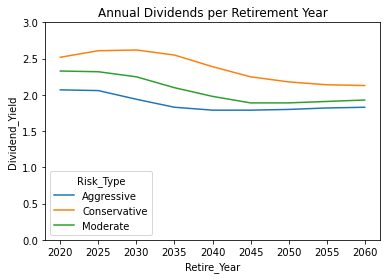

In [14]:
plt.title('Annual Dividends per Retirement Year')
sns.lineplot(data=raw, x='Retire_Year', y='Dividend_Yield', hue='Risk_Type');
plt.ylim(0.0,3.0);

In [15]:
# Which 5 pies have the highest dividends? (2020-2040 Conservative: avg 2.538%)
#raw[['Retire_Year', 'Risk_Type', 'Dividend_Yield']].nlargest(n=5, columns='Dividend_Yield')

In [16]:
# Which 5 pies have the lowest dividends? (2035-2055 Aggressive: avg 1.806)
#raw[['Retire_Year', 'Risk_Type', 'Dividend_Yield']].nsmallest(n=5, columns='Dividend_Yield')

<b>Visualizing how historic 1 year returns (%) change per retirement year (and in relation to risk type)</b>

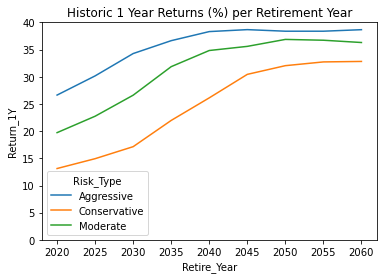

In [17]:
plt.title("Historic 1 Year Returns (%) per Retirement Year")
sns.lineplot(data=raw, x='Retire_Year', y='Return_1Y', hue='Risk_Type');
plt.ylim(0,40);

In [18]:
# Which 5 pies have the largest 1 year returns? (2040-2060 Aggressive: avg 38.49)
#raw[['Retire_Year', 'Risk_Type', 'Return_1Y']].nlargest(n=5, columns="Return_1Y")

In [19]:
# Which 5 pies have the smallest 1 year returns? (2020-2035 Conservative/Moderate: avg 17.386)
#raw[['Retire_Year', 'Risk_Type', 'Return_1Y']].nsmallest(n=5, columns="Return_1Y")

<b>Visualizing how historic 3 year returns (%) change per retirement year (and in relation to risk type)</b>

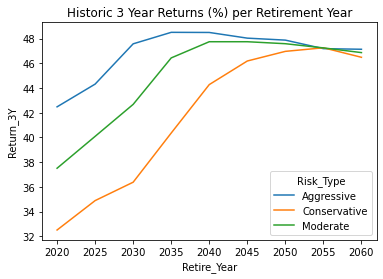

In [20]:
plt.title("Historic 3 Year Returns (%) per Retirement Year")
sns.lineplot(data=raw, x='Retire_Year',  y='Return_3Y', hue='Risk_Type');

In [21]:
# Which 5 pies have the largest 3 year returns? (2035-2050 Aggressive/Moderate: avg 48.136)
#raw[['Retire_Year', 'Risk_Type', 'Return_3Y']].nlargest(n=5, columns="Return_3Y")

In [22]:
# Which 5 pies have the smallest 3 year returns? (2020-2030 Conservative/Moderate: avg 36.276)
#raw[['Retire_Year', 'Risk_Type', 'Return_3Y']].nsmallest(n=5, columns="Return_3Y")

<b>Visualizing how historic 5 year returns (%) change per retirement year (and in relation to risk type)</b>

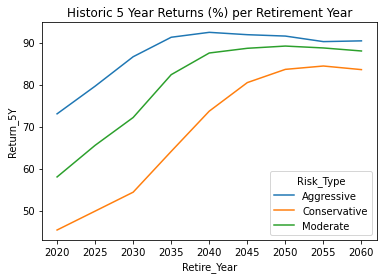

In [23]:
plt.title("Historic 5 Year Returns (%) per Retirement Year")
sns.lineplot(data=raw, x='Retire_Year', y='Return_5Y', hue='Risk_Type');

In [24]:
# Which 5 pies have the largest 5 year returns? (2035-2060 Aggressive: avg 91.52)
#raw[['Retire_Year', 'Risk_Type', 'Return_5Y']].nlargest(n=5, columns="Return_5Y")

In [25]:
# Which 5 pies have the smallest 5 year returns? (2020-2035 Conservative/Moderate: avg 54.346)
#raw[['Retire_Year', 'Risk_Type', 'Return_5Y']].nsmallest(n=5, columns="Return_5Y")

<h2>Exploring the Total Percentage Allocations of Security Types Over Time</h2>

<b>Exploring the total pie percentage allocated to each type of security</b>

In [26]:
raw['Total_Cash'] = raw['BIL']
raw['Total_Bonds'] = raw['BIV'] + raw['BLV'] + raw['BNDX'] + raw['BSV'] + raw['TIP']
raw['Total_Blend'] = raw['DBC']
raw['Total_Stocks'] = raw['VB'] + raw['VBK'] + raw['VBR'] + raw['VEA'] + raw['VNQ'] + raw['VO'] + raw['VOE'] + raw['VOO'] + raw['VOT'] + raw['VTV'] + raw['VUG'] + raw['VWO']

<b>Exploring the dataset based on the type of risk (aggressive, moderate, or conservative)</b>

In [27]:
#Changed from .copy() during geographical visualization
all_aggressive = raw[raw['Risk_Type']=='Aggressive']
all_moderate = raw[raw['Risk_Type']=='Moderate']
all_conservative = raw[raw['Risk_Type']=='Conservative']

In [28]:
#raw.head()
#all_aggressive.head()
#all_moderate.head()
#all_conservative.head()

<b>Visualizing the Percentage Composition of Different Security Types in M1 Aggressive Pies</b>

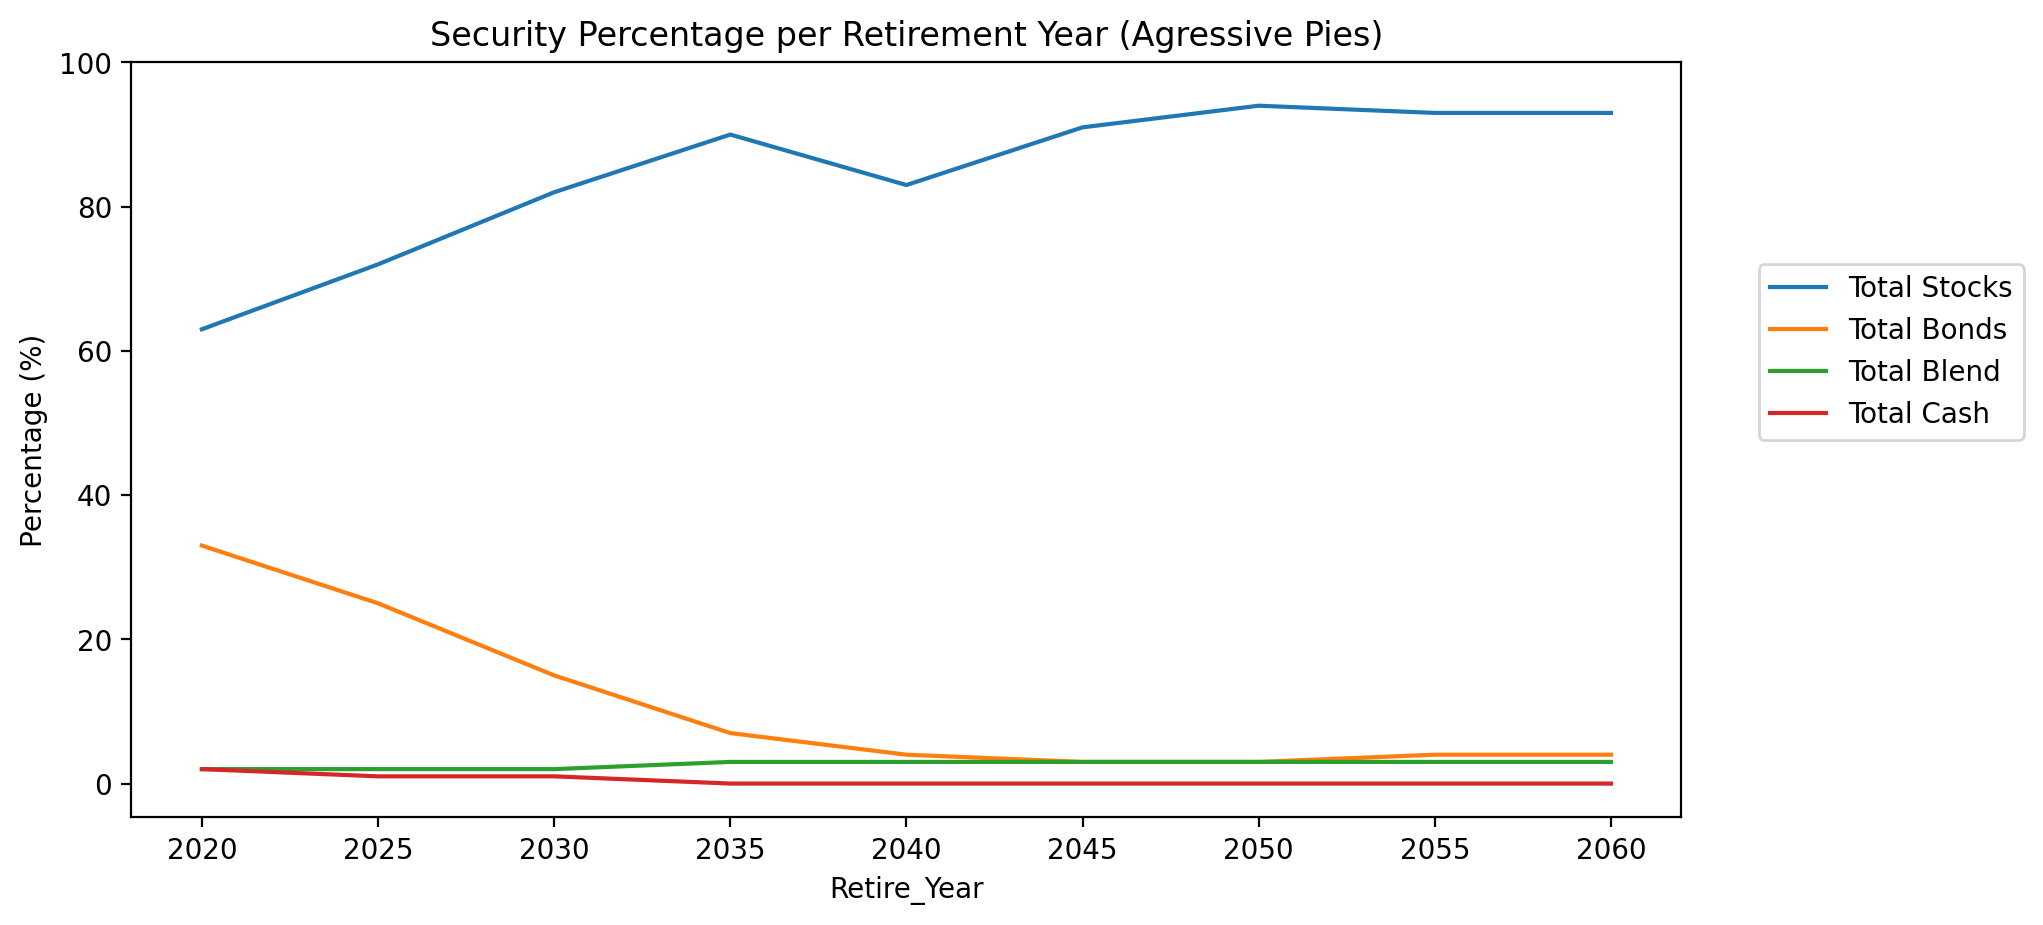

In [29]:
fig,ax= plt.subplots(figsize=(10,5), dpi=200)
plt.title("Security Percentage per Retirement Year (Agressive Pies)")
sns.lineplot(data=all_aggressive[['Retire_Year','Total_Stocks']], x='Retire_Year', y='Total_Stocks', label='Total Stocks')
sns.lineplot(data=all_aggressive[['Retire_Year','Total_Bonds']], x='Retire_Year', y='Total_Bonds', label='Total Bonds')
sns.lineplot(data=all_aggressive[['Retire_Year','Total_Blend']], x='Retire_Year', y='Total_Blend', label='Total Blend')
sns.lineplot(data=all_aggressive[['Retire_Year','Total_Cash']], x='Retire_Year', y='Total_Cash', label='Total Cash')
plt.xlabel("Retire_Year")
plt.ylabel("Percentage (%)")
plt.legend(loc=(1.05,0.5))
plt.ylim(top=100)
plt.show()

<b>Visualizing the Percentage Composition of Different Security Types in M1 Moderate Pies</b>

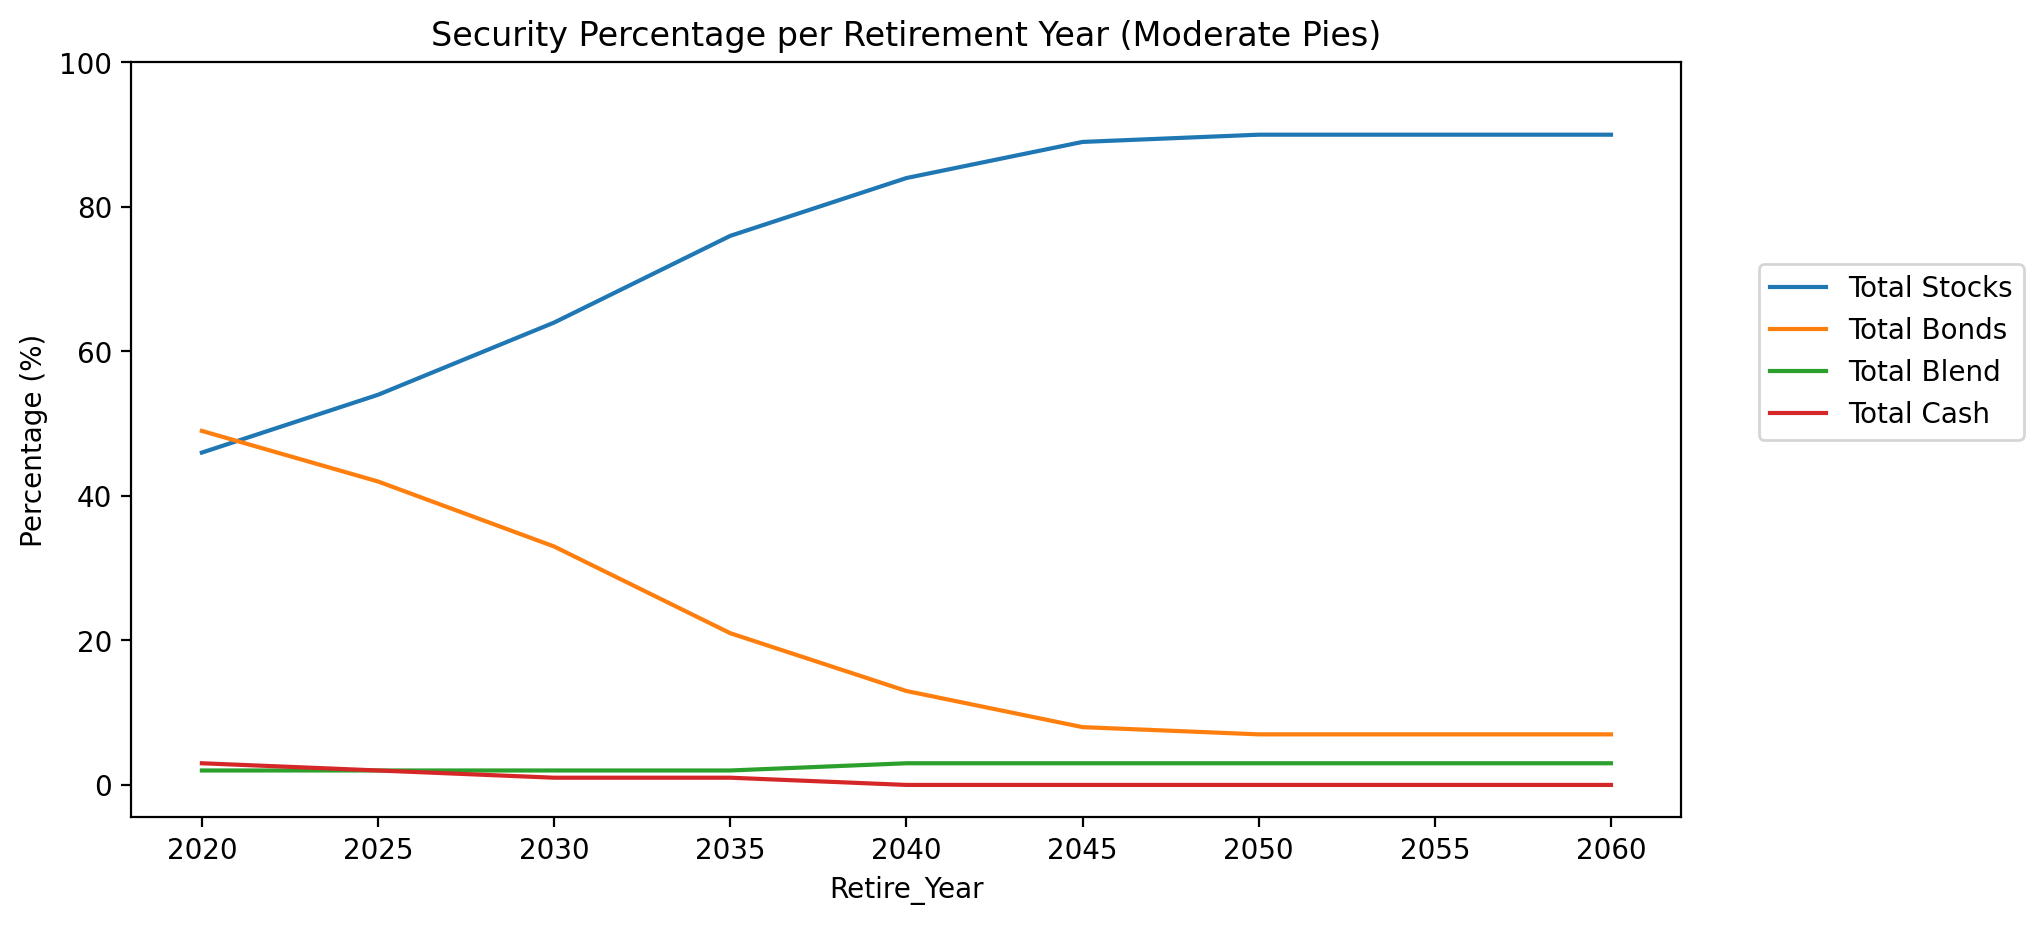

In [30]:
fig,ax= plt.subplots(figsize=(10,5), dpi=200)
plt.title("Security Percentage per Retirement Year (Moderate Pies)")
sns.lineplot(data=all_moderate[['Retire_Year','Total_Stocks']], x='Retire_Year', y='Total_Stocks', label='Total Stocks')
sns.lineplot(data=all_moderate[['Retire_Year','Total_Bonds']], x='Retire_Year', y='Total_Bonds', label='Total Bonds')
sns.lineplot(data=all_moderate[['Retire_Year','Total_Blend']], x='Retire_Year', y='Total_Blend', label='Total Blend')
sns.lineplot(data=all_moderate[['Retire_Year','Total_Cash']], x='Retire_Year', y='Total_Cash', label='Total Cash')
plt.xlabel("Retire_Year")
plt.ylabel("Percentage (%)")
plt.legend(loc=(1.05,0.5))
plt.ylim(top=100)
plt.show()

<b>Visualizing the Percentage Composition of Different Security Types in M1 Conservative Pies</b>

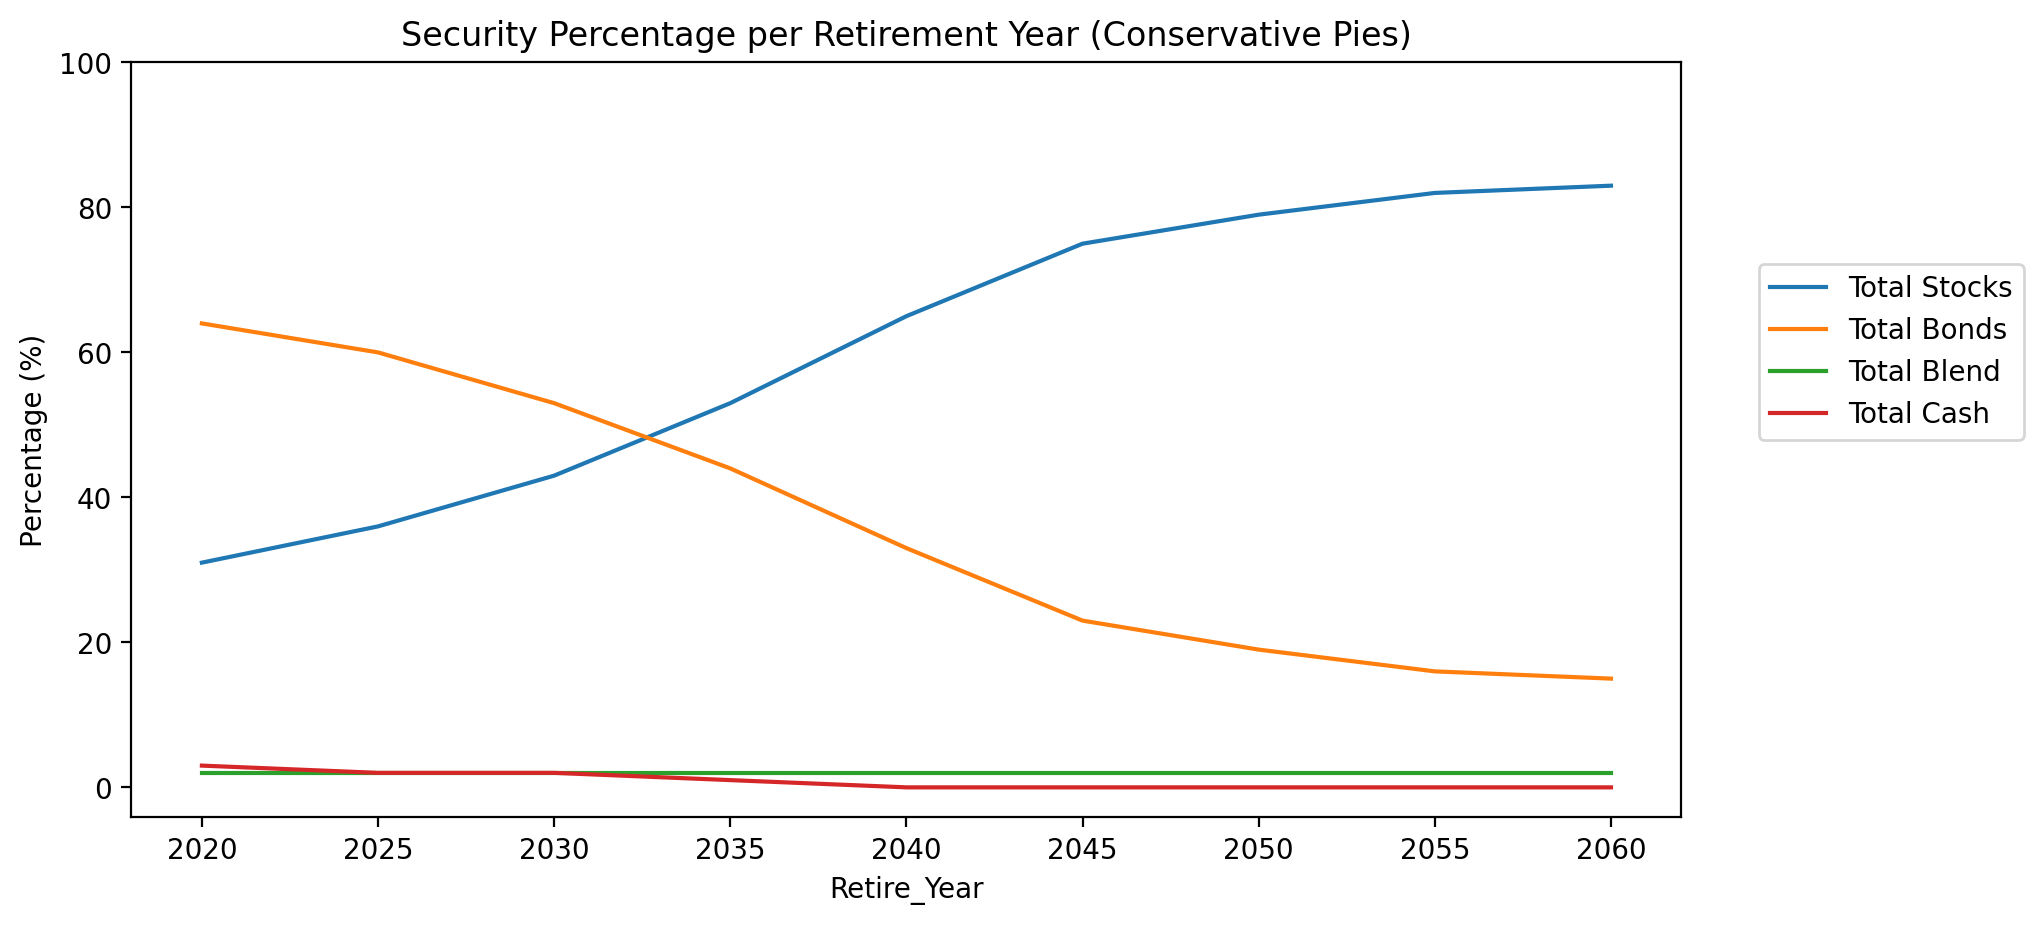

In [31]:
fig,ax= plt.subplots(figsize=(10,5), dpi=200)
plt.title("Security Percentage per Retirement Year (Conservative Pies)")
sns.lineplot(data=all_conservative[['Retire_Year','Total_Stocks']], x='Retire_Year', y='Total_Stocks', label='Total Stocks')
sns.lineplot(data=all_conservative[['Retire_Year','Total_Bonds']], x='Retire_Year', y='Total_Bonds', label='Total Bonds')
sns.lineplot(data=all_conservative[['Retire_Year','Total_Blend']], x='Retire_Year', y='Total_Blend', label='Total Blend')
sns.lineplot(data=all_conservative[['Retire_Year','Total_Cash']], x='Retire_Year', y='Total_Cash', label='Total Cash')
plt.xlabel("Retire_Year")
plt.ylabel("Percentage (%)")
plt.legend(loc=(1.05,0.5))
plt.ylim(top=100)
plt.show()

<h2>Exploring the Percentage Allocations of Individual Securities Over Time</h2>

In [32]:
raw.columns

Index(['Retire_Year', 'Risk_Type', 'Holdings', 'Expenses', 'Dividend_Yield',
       'Risk_Level', 'Return_1Y', 'Return_3Y', 'Return_5Y', 'BIL', 'BIV',
       'BLV', 'BNDX', 'BSV', 'DBC', 'TIP', 'VB', 'VBK', 'VBR', 'VEA', 'VNQ',
       'VO', 'VOE', 'VOO', 'VOT', 'VTV', 'VUG', 'VWO', 'Total_Cash',
       'Total_Bonds', 'Total_Blend', 'Total_Stocks'],
      dtype='object')

<b>Visualizing the Individual Security Percentages per Retirement Year (Aggressive Pies)</b>

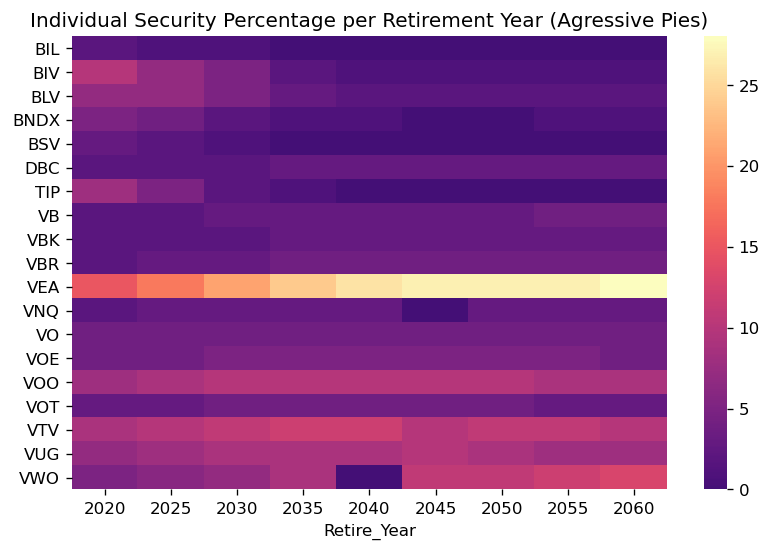

In [33]:
plt.figure(figsize=(8,5), dpi=120)
plt.title('Individual Security Percentage per Retirement Year (Agressive Pies)')
sns.heatmap(data=all_aggressive[['Retire_Year','BIL', 'BIV',
       'BLV', 'BNDX', 'BSV', 'DBC', 'TIP', 'VB', 'VBK', 'VBR', 'VEA', 'VNQ',
       'VO', 'VOE', 'VOO', 'VOT', 'VTV', 'VUG', 'VWO']].set_index('Retire_Year').transpose(), cmap='magma', center=10)
plt.show()

<b>Visualizing the Individual Security Percentages per Retirement Year (Moderate Pies)</b>

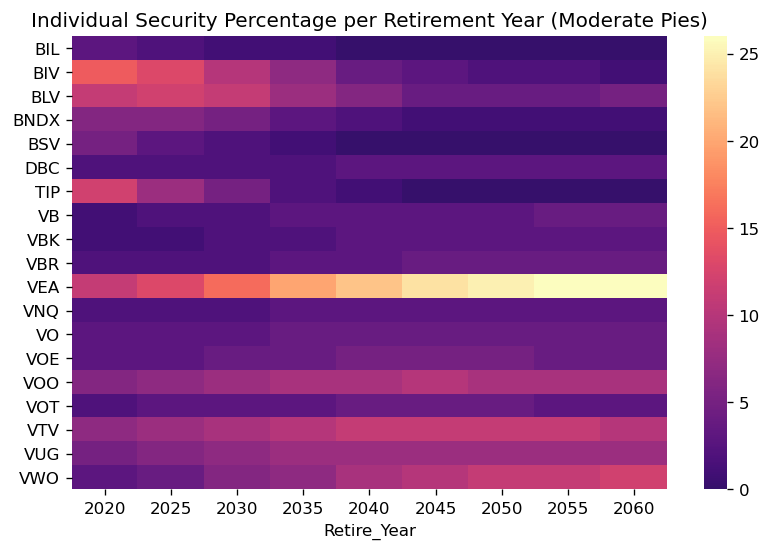

In [34]:
plt.figure(figsize=(8,5), dpi=120)
plt.title('Individual Security Percentage per Retirement Year (Moderate Pies)')
sns.heatmap(data=all_moderate[['Retire_Year','BIL', 'BIV',
       'BLV', 'BNDX', 'BSV', 'DBC', 'TIP', 'VB', 'VBK', 'VBR', 'VEA', 'VNQ',
       'VO', 'VOE', 'VOO', 'VOT', 'VTV', 'VUG', 'VWO']].set_index('Retire_Year').transpose(), cmap='magma', center=10)
plt.show()

<b>Visualizing the Individual Security Percentages per Retirement Year (Conservative Pies)</b>

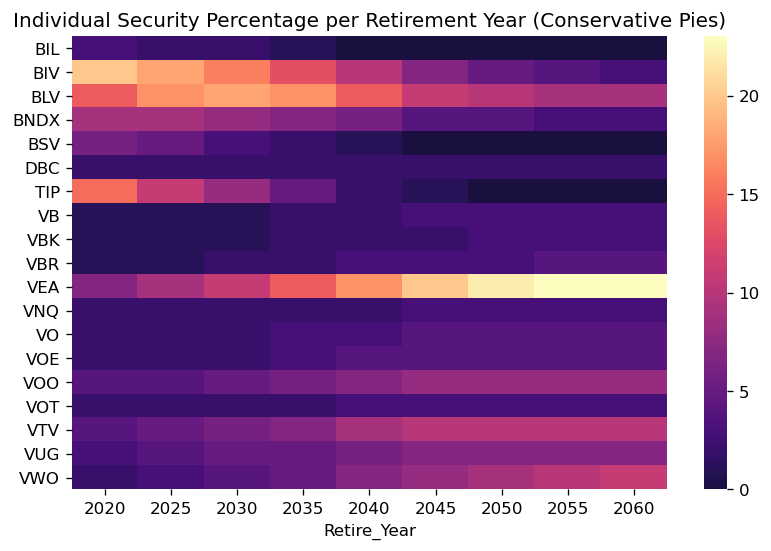

In [35]:
plt.figure(figsize=(8,5), dpi=120)
plt.title('Individual Security Percentage per Retirement Year (Conservative Pies)')
sns.heatmap(data=all_conservative[['Retire_Year','BIL', 'BIV',
       'BLV', 'BNDX', 'BSV', 'DBC', 'TIP', 'VB', 'VBK', 'VBR', 'VEA', 'VNQ',
       'VO', 'VOE', 'VOO', 'VOT', 'VTV', 'VUG', 'VWO']].set_index('Retire_Year').transpose(), cmap='magma', center=10)
plt.show()

<h2>Exploring the Geographical Concentration of Securities Over Time</h2>

In [36]:
raw['US_Conc'] = raw['BIV'] + raw['BLV'] + raw['BSV'] + raw['TIP'] + raw['VB'] + raw['VBK'] + raw['VBR'] + raw['VNQ'] + raw['VO'] + raw['VOE'] +raw['VOO'] + raw['VOT'] + raw['VTV'] + raw['VUG']
raw['Intl_Conc']= raw['BNDX'] + raw['VEA'] + raw['VWO']
raw['Mixed_Conc'] = raw['DBC']
raw['Nongeo_Conc'] = raw['BIL']

<b>Visualizing the Percentage Allocations of each Geographical Concentration</b>

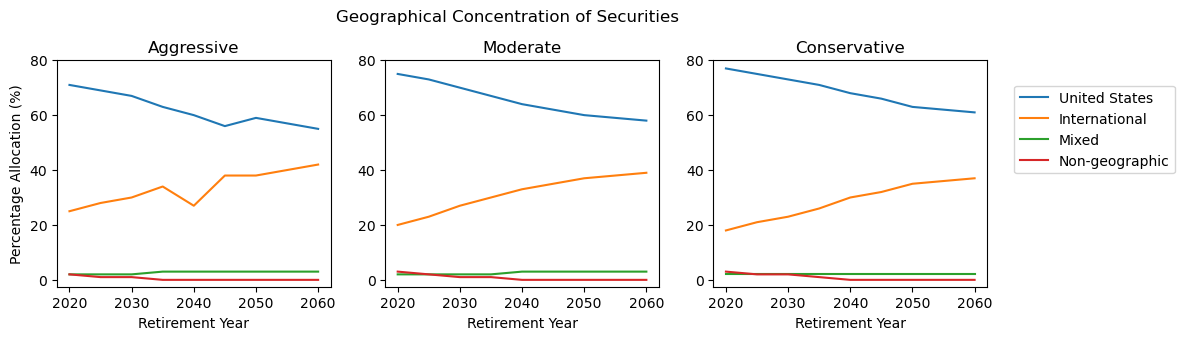

In [37]:
fig,ax= plt.subplots(nrows=1, ncols=3, dpi=100)
fig.set_size_inches(12,3)
fig.suptitle(t='Geographical Concentration of Securities', y=1.05)

#First Chart (Aggressive)
ax[0].set_title("Aggressive")
ax[0].set_ylabel("Percentage Allocation (%)")
ax[0].set_ylim(-2.5,80)
ax[0].set_xlabel("Retirement Year")
sns.lineplot(data=raw[raw['Risk_Type'] == 'Aggressive'], x='Retire_Year', y='US_Conc', ax=ax[0])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Aggressive'], x='Retire_Year', y='Intl_Conc', ax=ax[0])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Aggressive'], x='Retire_Year', y='Mixed_Conc', ax=ax[0])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Aggressive'], x='Retire_Year', y='Nongeo_Conc', ax=ax[0])

#Second Chart (Moderate)
ax[1].set_title("Moderate")
ax[1].set_xlabel("Retirement Year")
ax[1].set_ylabel(" ")
ax[1].set_ylim(-2.5,80)
sns.lineplot(data=raw[raw['Risk_Type'] == 'Moderate'], x='Retire_Year', y='US_Conc', ax=ax[1])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Moderate'], x='Retire_Year', y='Intl_Conc', ax=ax[1])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Moderate'], x='Retire_Year', y='Mixed_Conc', ax=ax[1])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Moderate'], x='Retire_Year', y='Nongeo_Conc', ax=ax[1])

#Third Chart (Conservative)
ax[2].set_title("Conservative")
ax[2].set_xlabel("Retirement Year")
ax[2].set_ylabel(" ")
ax[2].set_ylim(-2.5,80)
sns.lineplot(data=raw[raw['Risk_Type'] == 'Conservative'], x='Retire_Year', y='US_Conc', ax=ax[2], label='United States')
sns.lineplot(data=raw[raw['Risk_Type'] == 'Conservative'], x='Retire_Year', y='Intl_Conc', ax=ax[2], label='International')
sns.lineplot(data=raw[raw['Risk_Type'] == 'Conservative'], x='Retire_Year', y='Mixed_Conc', ax=ax[2], label='Mixed')
sns.lineplot(data=raw[raw['Risk_Type'] == 'Conservative'], x='Retire_Year', y='Nongeo_Conc', ax=ax[2], label='Non-geographic')
ax[2].legend(loc=(1.1,0.5))

plt.show()

<h2>Exploring the General Cap Preference Over Time</h2>

In [38]:
raw['Small_Cap'] = raw['VB'] + raw['VBK'] + raw['VBR']
raw['Mid_Cap'] = raw['VO'] + raw['VOE'] + raw['VOT']
#No large cap ETFs in the M1 Expert Pies

<b>Visualizing the Percentage Allocations of each Single-Cap Specified ETF</b>

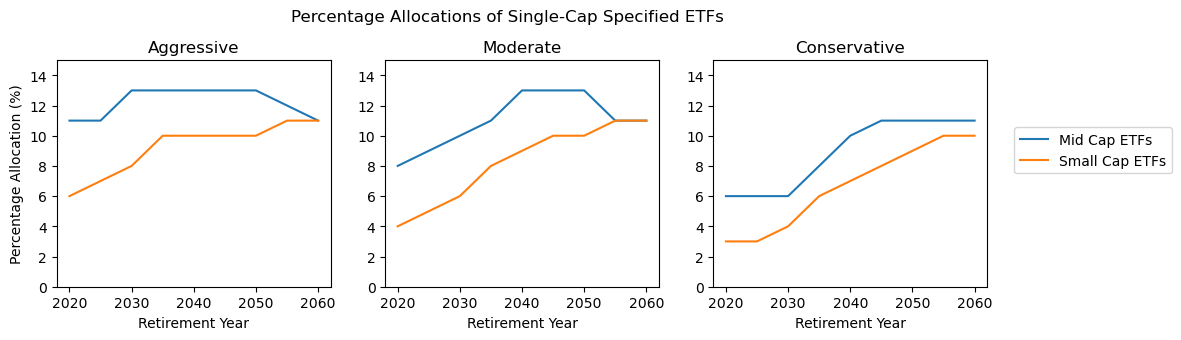

In [39]:
fig,ax= plt.subplots(nrows=1, ncols=3, dpi=100)
fig.set_size_inches(12,3)
fig.suptitle(t='Percentage Allocations of Single-Cap Specified ETFs', y=1.05)

#First Chart (Aggressive)
ax[0].set_title("Aggressive")
ax[0].set_ylabel("Percentage Allocation (%)")
ax[0].set_xlabel("Retirement Year")
ax[0].set_ylim(0,15)
sns.lineplot(data=raw[raw['Risk_Type'] == 'Aggressive'], x='Retire_Year', y='Mid_Cap', ax=ax[0])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Aggressive'], x='Retire_Year', y='Small_Cap', ax=ax[0])

#Second Chart (Moderate)
ax[1].set_title("Moderate")
ax[1].set_xlabel("Retirement Year")
ax[1].set_ylabel(' ')
ax[1].set_ylim(0,15)
sns.lineplot(data=raw[raw['Risk_Type'] == 'Moderate'], x='Retire_Year', y='Mid_Cap', ax=ax[1])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Moderate'], x='Retire_Year', y='Small_Cap', ax=ax[1])

#Third Chart (Conservative)
ax[2].set_title("Conservative")
ax[2].set_xlabel("Retirement Year")
ax[2].set_ylabel(' ')
ax[2].set_ylim(0,15)
sns.lineplot(data=raw[raw['Risk_Type'] == 'Conservative'], x='Retire_Year', y='Mid_Cap', ax=ax[2], label='Mid Cap ETFs')
sns.lineplot(data=raw[raw['Risk_Type'] == 'Conservative'], x='Retire_Year', y='Small_Cap', ax=ax[2], label='Small Cap ETFs')
ax[2].legend(loc=(1.1,0.5))

plt.show()

<h2>Exploring the Preference of Value vs. Growth Securities Over Time</h2>

In [40]:
raw['Growth'] = raw['VBK'] + raw['VOT'] + raw['VUG']
raw['Value'] = raw['VBR'] + raw['VOE'] + raw['VTV']

<b>Visualizing the Percentage Allocations of Value vs. Growth ETFs</b>

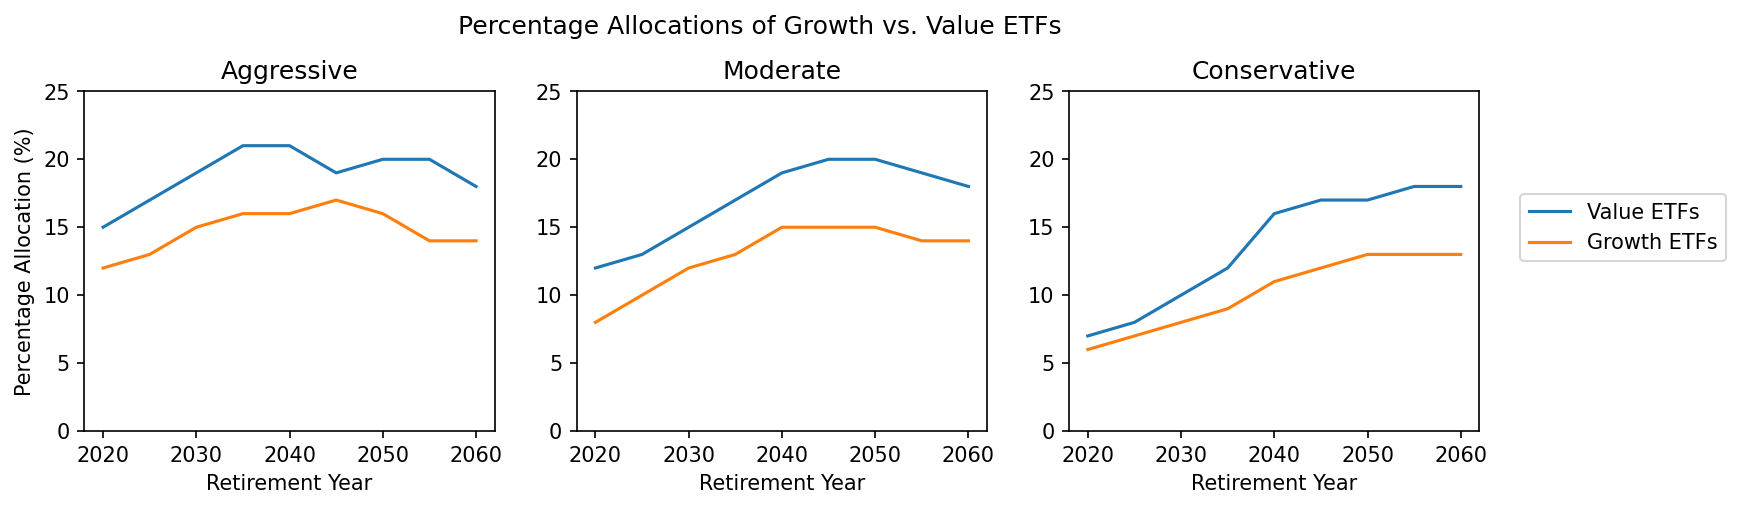

In [41]:
fig,ax= plt.subplots(nrows=1, ncols=3, dpi=150)
fig.set_size_inches(12,3)
fig.suptitle(t='Percentage Allocations of Growth vs. Value ETFs', y=1.05)

#First Chart (Aggressive)
ax[0].set_title("Aggressive")
ax[0].set_ylabel("Percentage Allocation (%)")
ax[0].set_xlabel("Retirement Year")
ax[0].set_ylim(0,25)
sns.lineplot(data=raw[raw['Risk_Type'] == 'Aggressive'], x='Retire_Year', y='Value', ax=ax[0])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Aggressive'], x='Retire_Year', y='Growth', ax=ax[0])

#Second Chart (Moderate)
ax[1].set_title("Moderate")
ax[1].set_xlabel("Retirement Year")
ax[1].set_ylabel(' ')
ax[1].set_ylim(0,25)
sns.lineplot(data=raw[raw['Risk_Type'] == 'Moderate'], x='Retire_Year', y='Value', ax=ax[1])
sns.lineplot(data=raw[raw['Risk_Type'] == 'Moderate'], x='Retire_Year', y='Growth', ax=ax[1])

#Third Chart (Conservative)
ax[2].set_title("Conservative")
ax[2].set_xlabel("Retirement Year")
ax[2].set_ylabel(' ')
ax[2].set_ylim(0,25)
sns.lineplot(data=raw[raw['Risk_Type'] == 'Conservative'], x='Retire_Year', y='Value', ax=ax[2], label='Value ETFs')
sns.lineplot(data=raw[raw['Risk_Type'] == 'Conservative'], x='Retire_Year', y='Growth', ax=ax[2], label='Growth ETFs')
ax[2].legend(loc=(1.1,0.5))

plt.show()